In [1]:
import  VARmodel

In [2]:
import loadDataForSKtime

loader = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = loader.load_data(2)
train_data, test_data = loader.split_train_test(df)


<class 'list'>
Patient 1: Dropping — constant columns found


In [3]:
df

HR  O2Sat    SBP    MAP   DBP  Resp   Temp
Patient_ID ICULOS                                              
2          1       -1.0   -1.0   -1.0   -1.0  -1.0  -1.0  -1.00
           2       61.0   99.0  124.0   65.0  43.0  17.5  36.44
           3       64.0   98.0  125.0   64.0  41.0  27.0  -1.00
           4       56.0  100.0  123.0   65.0  41.0   9.0  -1.00
           5       66.0   99.0  120.0   67.0  43.0  23.0  -1.00
           6       94.0  100.0  194.0  116.0  66.0  14.0  36.22
           7       58.0   99.0  133.0   68.0  43.0  13.0  -1.00
           8       57.0  100.0  118.0   62.0  37.0  18.0  -1.00
           9       62.0  100.0  126.0   66.0  37.0  12.0  -1.00
           10      58.0   95.0  143.0   77.0  47.0  11.0  36.11
           11      60.0   95.0  153.0   83.0  49.0  13.0  -1.00
           12      60.0   94.0  140.0   74.0  44.0  12.0  -1.00
           13      62.0   95.0  139.0   72.0  44.0  12.0  -1.00
           14      63.0   95.0  143.0   75.0  44.0  11.0  -1.00
           15      63.0   97.0  154.0   81.0  46.0  11.0  36.11
           16      58.0   94.0  114.0   58.0  36.0  10.0  -1.00
           17      54.0   97.0   -1.0   50.5  -1.0  12.0  -1.00
           18      55.0   97.0   -1.0   52.0  -1.0  16.0  36.00
           19      54.0   95.0   -1.0   53.0  -1.0  -1.0  -1.00
           20      63.0   98.0   -1.0   58.0  -1.0  -1.0  -1.00
           21      57.0   95.0   -1.0   52.0  -1.0  -1.0  -1.00
           22      61.0   97.0   -1.0   58.0  -1.0  18.0  36.11
           23      55.0   95.0   -1.0   51.0  -1.0  11.0  -1.00

In [4]:
VARforecaster = VARmodel.VARForecaster(train_data, test_data, ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])

In [5]:
VARforecaster.fit()
VARforecasts = VARforecaster.predict(steps=6)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [7]:
VARforecasts

HR       O2Sat          SBP         MAP  \
Patient_ID ICULOS                                                    
2          18      171.176837  108.968097   485.274444  240.446727   
           19      -60.769534   85.888411  -274.308747 -126.147436   
           20      223.394492  115.845614   677.275379  332.817162   
           21     -147.285577   72.612998  -580.352054 -261.181618   
           22      350.995182  129.160896  1114.002942  533.330476   
           23     -324.824378   54.079897 -1184.576543 -546.620298   

                          DBP       Resp        Temp  
Patient_ID ICULOS                                     
2          18      176.525205  10.403367  218.709099  
           19     -105.634545  40.368749 -285.258646  
           20      238.638055 -20.859384  338.771774  
           21     -215.904498  51.846553 -418.180344  
           22      399.088868 -37.730565  602.315964  
           23     -435.473346  84.743349 -796.224556

In [6]:
VARforecaster.evaluate_model(VARforecasts)

Mean Absolute Error: 289.28412517324244


ValueError: setting an array element with a sequence.

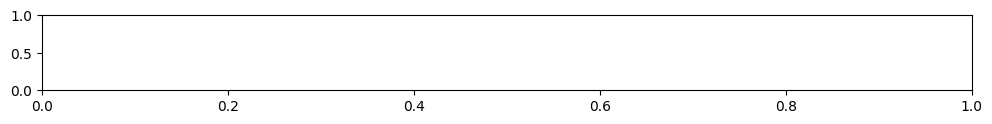

In [6]:
VARforecaster.plot_forecast(VARforecasts)

In [10]:
train_data

HR  O2Sat    SBP    MAP   DBP  Resp   Temp
Patient_ID ICULOS                                              
2          1       -1.0   -1.0   -1.0   -1.0  -1.0  -1.0  -1.00
           2       61.0   99.0  124.0   65.0  43.0  17.5  36.44
           3       64.0   98.0  125.0   64.0  41.0  27.0  -1.00
           4       56.0  100.0  123.0   65.0  41.0   9.0  -1.00
           5       66.0   99.0  120.0   67.0  43.0  23.0  -1.00
           6       94.0  100.0  194.0  116.0  66.0  14.0  36.22
           7       58.0   99.0  133.0   68.0  43.0  13.0  -1.00
           8       57.0  100.0  118.0   62.0  37.0  18.0  -1.00
           9       62.0  100.0  126.0   66.0  37.0  12.0  -1.00
           10      58.0   95.0  143.0   77.0  47.0  11.0  36.11
           11      60.0   95.0  153.0   83.0  49.0  13.0  -1.00
           12      60.0   94.0  140.0   74.0  44.0  12.0  -1.00
           13      62.0   95.0  139.0   72.0  44.0  12.0  -1.00
           14      63.0   95.0  143.0   75.0  44.0  11.0  -1.00
           15      63.0   97.0  154.0   81.0  46.0  11.0  36.11
           16      58.0   94.0  114.0   58.0  36.0  10.0  -1.00
           17      54.0   97.0   -1.0   50.5  -1.0  12.0  -1.00